# Solving Kepler's equation using Newton-Raphson method.

## Kepler's equation is the following:

$$ M = E -esinE$$

## This equation has to be solved numerically. In this notebook I will solve it using Newton-Raphson's method. The *quid* of this is the following formula:

$$ x_{n+1}= x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

## For this particular example, I am following the recomendation of <a href="https://arxiv.org/pdf/1009.1738.pdf">Murray and Correira</a>  of taking into account Danby's advises while solving Kepler's equations by Newton-Raphson's method. According to Danby, the first step is to create the following function g(E), involving Kepler's equation:
$$ g(E) = E - esinE - M $$

## Now the thing is to find out the root of  $g(E)$. In order to do so, I need some arbitrary values for $e$ , $M$ and also $E_{0}$. I will use $e = 0.5$ and $M = \frac{\pi}{6}$, along with Danby's recommendation of setting $E_{0} = M$. Once the root of $g(E)$ is obtained,  the distance vector, $r$, can be obtained as well with the following equation:
$$  r = a(1-cosE)$$

## With both $E$ and $r$, the true anomally, $f$, can be finally obtained with the following equation:

$$ r = \frac{a(1-e^{2})}{1 +ecosf}$$

## This explanation is of particular importance because of a precedent error that I made. In order to create a useful funciton for a RV-plot fitting, is neccessary to find $f$, but since $f$ and $M$ are related, I remove $f$ from the equation of RV of Murray and Correira's chapter and put $M$ instead. This is not the way the whole thing works. So it is imperative to obtain first $E$  in order to find the true anomally. 

In [6]:
#Import main libraries
import numpy as np

#Define the function which root we are going to find
def g_E(E,params):
    M = params[0]
    e = params[1]  
    g = E - e*np.sin(E) - M
    return g

#Now its time to define its derivative with respecto to 'E'
def Dif_g(E,params):
    M = params[0]
    e = params[1]
    Dg = 1 - e*np.cos(E)
    return Dg

#Now I give values to M and e and start to iterate. Following the advise of Mondy
# E0 = M is a good choice for the initial value.
M = np.pi/6
e = 0.5
E0 = M
i = 1
for iteration in range(1,11):
    E1 = E0 - g_E(E0, [M,e])/Dif_g(E0, [M,e])
    E0 = E1
    print("For iteration number", i,", the aproximate root is:",E0)
    i = i + 1

For iteration number 1 , the aproximate root is: 0.9645257607959048
For iteration number 2 , the aproximate root is: 0.9225208202429863
For iteration number 3 , the aproximate root is: 0.9220066807892194
For iteration number 4 , the aproximate root is: 0.9220066053171304
For iteration number 5 , the aproximate root is: 0.9220066053171289
For iteration number 6 , the aproximate root is: 0.9220066053171289
For iteration number 7 , the aproximate root is: 0.9220066053171289
For iteration number 8 , the aproximate root is: 0.9220066053171289
For iteration number 9 , the aproximate root is: 0.9220066053171289
For iteration number 10 , the aproximate root is: 0.9220066053171289


 ## Great! I found the root of $g(E)$. But it seem that the code can be improved a little bit. For instance, the last 6 iterations gave the same root for $g(E)$. So, just 4 iterations are needed. I have to get rid off the other 6. A good idea to do that is to make iterations as long as the difference between consecutive roots ( i.e. $ | E_{1} - E_{0} |$) is greater than certain value, like $1\times10^{-10}$. Once this difference (that can be called decimal error) has become lower than the given value, we can stop the iterations. We can put this into the code as follows:

In [8]:
#Import main libraries
import numpy as np

#Define the function which root we are going to find
def g_E(E,params):
    M = params[0]
    e = params[1]  
    g = E - e*np.sin(E) - M
    return g

#Now its time to define its derivative with respecto to 'E'
def Dif_g(E,params):
    M = params[0]
    e = params[1]
    Dg = 1 - e*np.cos(E)
    return Dg

#Now I give values to M and e and start to iterate. Following the advise of Mondy
# E0 = M is a good choice for the initial value.
M = np.pi/6
e = 0.5
E0 = M
i = 1
error = 10
while error > 1e-10 :
    E1 = E0 - g_E(E0, [M,e])/Dif_g(E0, [M,e])
    error = np.abs(E1-E0)
    E0 = E1
    print("For iteration number", i,", the aproximate root is:",E0)
    i = i + 1

For iteration number 1 , the aproximate root is: 0.9645257607959048
For iteration number 2 , the aproximate root is: 0.9225208202429863
For iteration number 3 , the aproximate root is: 0.9220066807892194
For iteration number 4 , the aproximate root is: 0.9220066053171304
For iteration number 5 , the aproximate root is: 0.9220066053171289


 ## Great! As I said, only four iterations are really needed to solve Kepler's equation with the given values of $M$ and $e$. Now let's find out $r$. But before, just a little reminder, the value of $E$ given by the code is an angle in radians. Python works with radians by default. I need also the value of the semi-major axis, $a$. Let's say for this case that $a = 0.03$ [AU]. Now $r$ is:
 $$ r = 0.03[AU](1-cos(0.9220066053171289) = 0.019[AU]$$
 
 ## Now let's find the true anomaly $f$!

 $$ cos(f) = \frac{1}{e} (\frac{a(1-e^{2})}{r} -1)$$
 
 ## Then:
 
 $$  f = cos^{-1} ( \frac{1}{e} (\frac{a(1-e^{2})}{r} -1) )$$
 
 ## Putting the values:
 
 $$ f = 1.194 [rad]$$
 
 ## Great! Now I got $M$, $f$, $e$, $a$ and $r$.  It is time to make  a RV function which plot can change when I change the eccentricity $e$. A very interesting thing that I found <a href="https://en.wikipedia.org/wiki/True_anomaly">Here</a> is that the true anomaly, $f$, can be expanded with the following Fourier's serie:
 $$f = M + (2e - \frac{1}{4}e^{3})sinM + \frac{5}{4}e^{2}sin2M + \frac{13}{12}e^{3}sin3M + ... $$
 
 ## For this example, $f = 1.19[rad]$ and $M = \frac{\pi}{6} = \frac{2\pi(t-t_{0})}{T} = \frac{12(t-t_{0})}{T}  $.  Now, I can change the RV equation that I derived before. That equation is the following:
 
$$v_{r} = v_{z} + K[ cos(\omega)cos(f) -sin(\omega)sin(f) + ecos(\omega)] $$

## Putting now $f = M = \frac{12(t-t_{0})}{T}$ into the precedent equation as a first order approximation I obtain:

 
$$v_{r} = v_{z} + K[ cos(\omega)cos(\frac{12(t-t_{0})}{T}) -sin(\omega)sin(\frac{12(t-t_{0})}{T}) + ecos(\omega)] $$

## Of course, the plot of this equation won't change if change the eccentricity. I need to apporximate $f$ to at least the second term in the Fourier's serie. But let's do it with the first term approximation anyways, for some sort of completness. I will use the same values for $t$ and $\omega$ that I used before. For an eccentricity of $e = 0.001$, the plot looks like this:

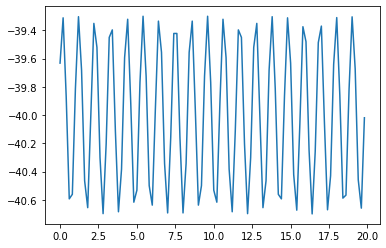

In [1]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#We write the funcition:
#K  -> Doppler semi amplitude
#vZ -> Proper motion of the barycenter (or star's systemic velocity)
#w  -> argument of periapsis
#e  -> Excentricity 
#T  -> Orbital period
#t0 -> Time of passage of periastron (or time of minimal conjunction)
def calcula_RV(t,parametros):
    vz = parametros[0]
    K  = parametros[1]
    T  = parametros[2]
    w  = parametros[3]
    t0 = parametros[4]
    e  = parametros[5]
    vr = vz + K*(np.cos(w)*np.cos(12*(t-t0)/T) - np.sin(w)*np.sin(12*(t-t0)/T) + e*np.cos(w))
    return vr

#Now the time vector will be displayed. I will put it from 0 to 20 days, with a point in the plot every 0.2 days.

t = np.arange(0,20,0.2)

#Now the parameters

vz = -40 #km/s
K  = 0.7 #km/s
T  = 2   #days
w  = 33  #°
t0 = 13  #days
e  = 0.001

#Now we call the function that plots the RV plot

vr = calcula_RV(t,[vz,K,T,w,t0,e])

#Now we plot it

plt.plot(t,vr)

## Now I change the eccentricity to $e = 0.9$.

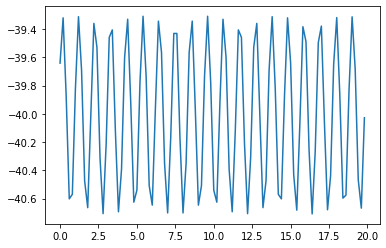

In [2]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#We write the funcition:
#K  -> Doppler semi amplitude
#vZ -> Proper motion of the barycenter (or star's systemic velocity)
#w  -> argument of periapsis
#e  -> Excentricity 
#T  -> Orbital period
#t0 -> Time of passage of periastron (or time of minimal conjunction)
def calcula_RV(t,parametros):
    vz = parametros[0]
    K  = parametros[1]
    T  = parametros[2]
    w  = parametros[3]
    t0 = parametros[4]
    e  = parametros[5]
    vr = vz + K*(np.cos(w)*np.cos(12*(t-t0)/T) - np.sin(w)*np.sin(12*(t-t0)/T) + e*np.cos(w))
    return vr

#Now the time vector will be displayed. I will put it from 0 to 20 days, with a point in the plot every 0.2 days.

t = np.arange(0,20,0.2)

#Now the parameters

vz = -40 #km/s
K  = 0.7 #km/s
T  = 2   #days
w  = 33  #°
t0 = 13  #days
e  = 0.9

#Now we call the function that plots the RV plot

vr = calcula_RV(t,[vz,K,T,w,t0,e])

#Now we plot it

plt.plot(t,vr)

## As I said before, nothing happened to the plot! So now let's use the second order approximation: $f = M + (2e - \frac{1}{4}e^{3}) sin(M)$ into the RV equation. This is $f = \frac{12(t-t_{0})}{T} + (2(0.5) - \frac{1}{4}(0.5)^{3})sin(\frac{12(t-t_{0}}{T})$. For an eccentricity of $e = 0.001$, the plot looks like this:

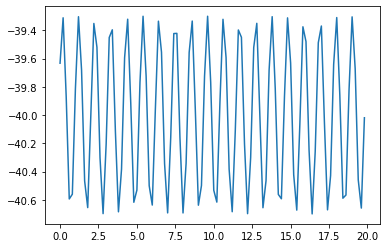

In [4]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#We write the funcition:
#K  -> Doppler semi amplitude
#vZ -> Proper motion of the barycenter (or star's systemic velocity)
#w  -> argument of periapsis
#e  -> Excentricity 
#T  -> Orbital period
#t0 -> Time of passage of periastron (or time of minimal conjunction)
def calcula_RV(t,parametros):
    vz = parametros[0]
    K  = parametros[1]
    T  = parametros[2]
    w  = parametros[3]
    t0 = parametros[4]
    e  = parametros[5]
    vr = vz + K*(np.cos(w)*np.cos(12*(t-t0)/T) - np.sin(w)*np.sin(12*(t-t0)/T + (2*(e) - (e**3)/4)*np.sin(12*(t-t0)/T)) + e*np.cos(w))
    return vr

#Now the time vector will be displayed. I will put it from 0 to 20 days, with a point in the plot every 0.2 days.

t = np.arange(0,20,0.2)

#Now the parameters

vz = -40 #km/s
K  = 0.7 #km/s
T  = 2   #days
w  = 33  #°
t0 = 13  #days
e  = 0.001

#Now we call the function that plots the RV plot

vr = calcula_RV(t,[vz,K,T,w,t0,e])

#Now we plot it

plt.plot(t,vr)

## Now let's change the eccentricity to $e = 0.9$.

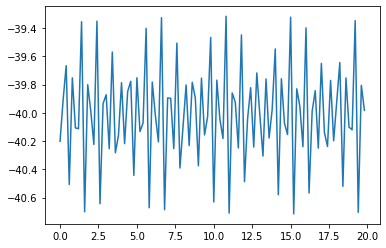

In [5]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#We write the funcition:
#K  -> Doppler semi amplitude
#vZ -> Proper motion of the barycenter (or star's systemic velocity)
#w  -> argument of periapsis
#e  -> Excentricity 
#T  -> Orbital period
#t0 -> Time of passage of periastron (or time of minimal conjunction)
def calcula_RV(t,parametros):
    vz = parametros[0]
    K  = parametros[1]
    T  = parametros[2]
    w  = parametros[3]
    t0 = parametros[4]
    e  = parametros[5]
    vr = vz + K*(np.cos(w)*np.cos(12*(t-t0)/T) - np.sin(w)*np.sin(12*(t-t0)/T + (2*(e) - (e**3)/4)*np.sin(12*(t-t0)/T)) + e*np.cos(w))
    return vr

#Now the time vector will be displayed. I will put it from 0 to 20 days, with a point in the plot every 0.2 days.

t = np.arange(0,20,0.2)

#Now the parameters

vz = -40 #km/s
K  = 0.7 #km/s
T  = 2   #days
w  = 33  #°
t0 = 13  #days
e  = 0.9

#Now we call the function that plots the RV plot

vr = calcula_RV(t,[vz,K,T,w,t0,e])

#Now we plot it

plt.plot(t,vr)

## Now the plot changed! It looks awful but that's the way it has to look when the eccentricity is that high!:D